<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/TA_Clf_Models_ExplainedV4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [55]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [56]:
df_encoded = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [57]:
df_encoded.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    object 
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [59]:
df = {'Accept':0, 'Unaccept':1}
df_encoded = df_encoded.copy()
for i in range(5,6):
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)
df_encoded

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [60]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

#Spitt Data

In [61]:
X = df_encoded.drop(['Thermal_acceptance','Thermal_sensation_Vote'], axis =1)
y = df_encoded['Thermal_acceptance']

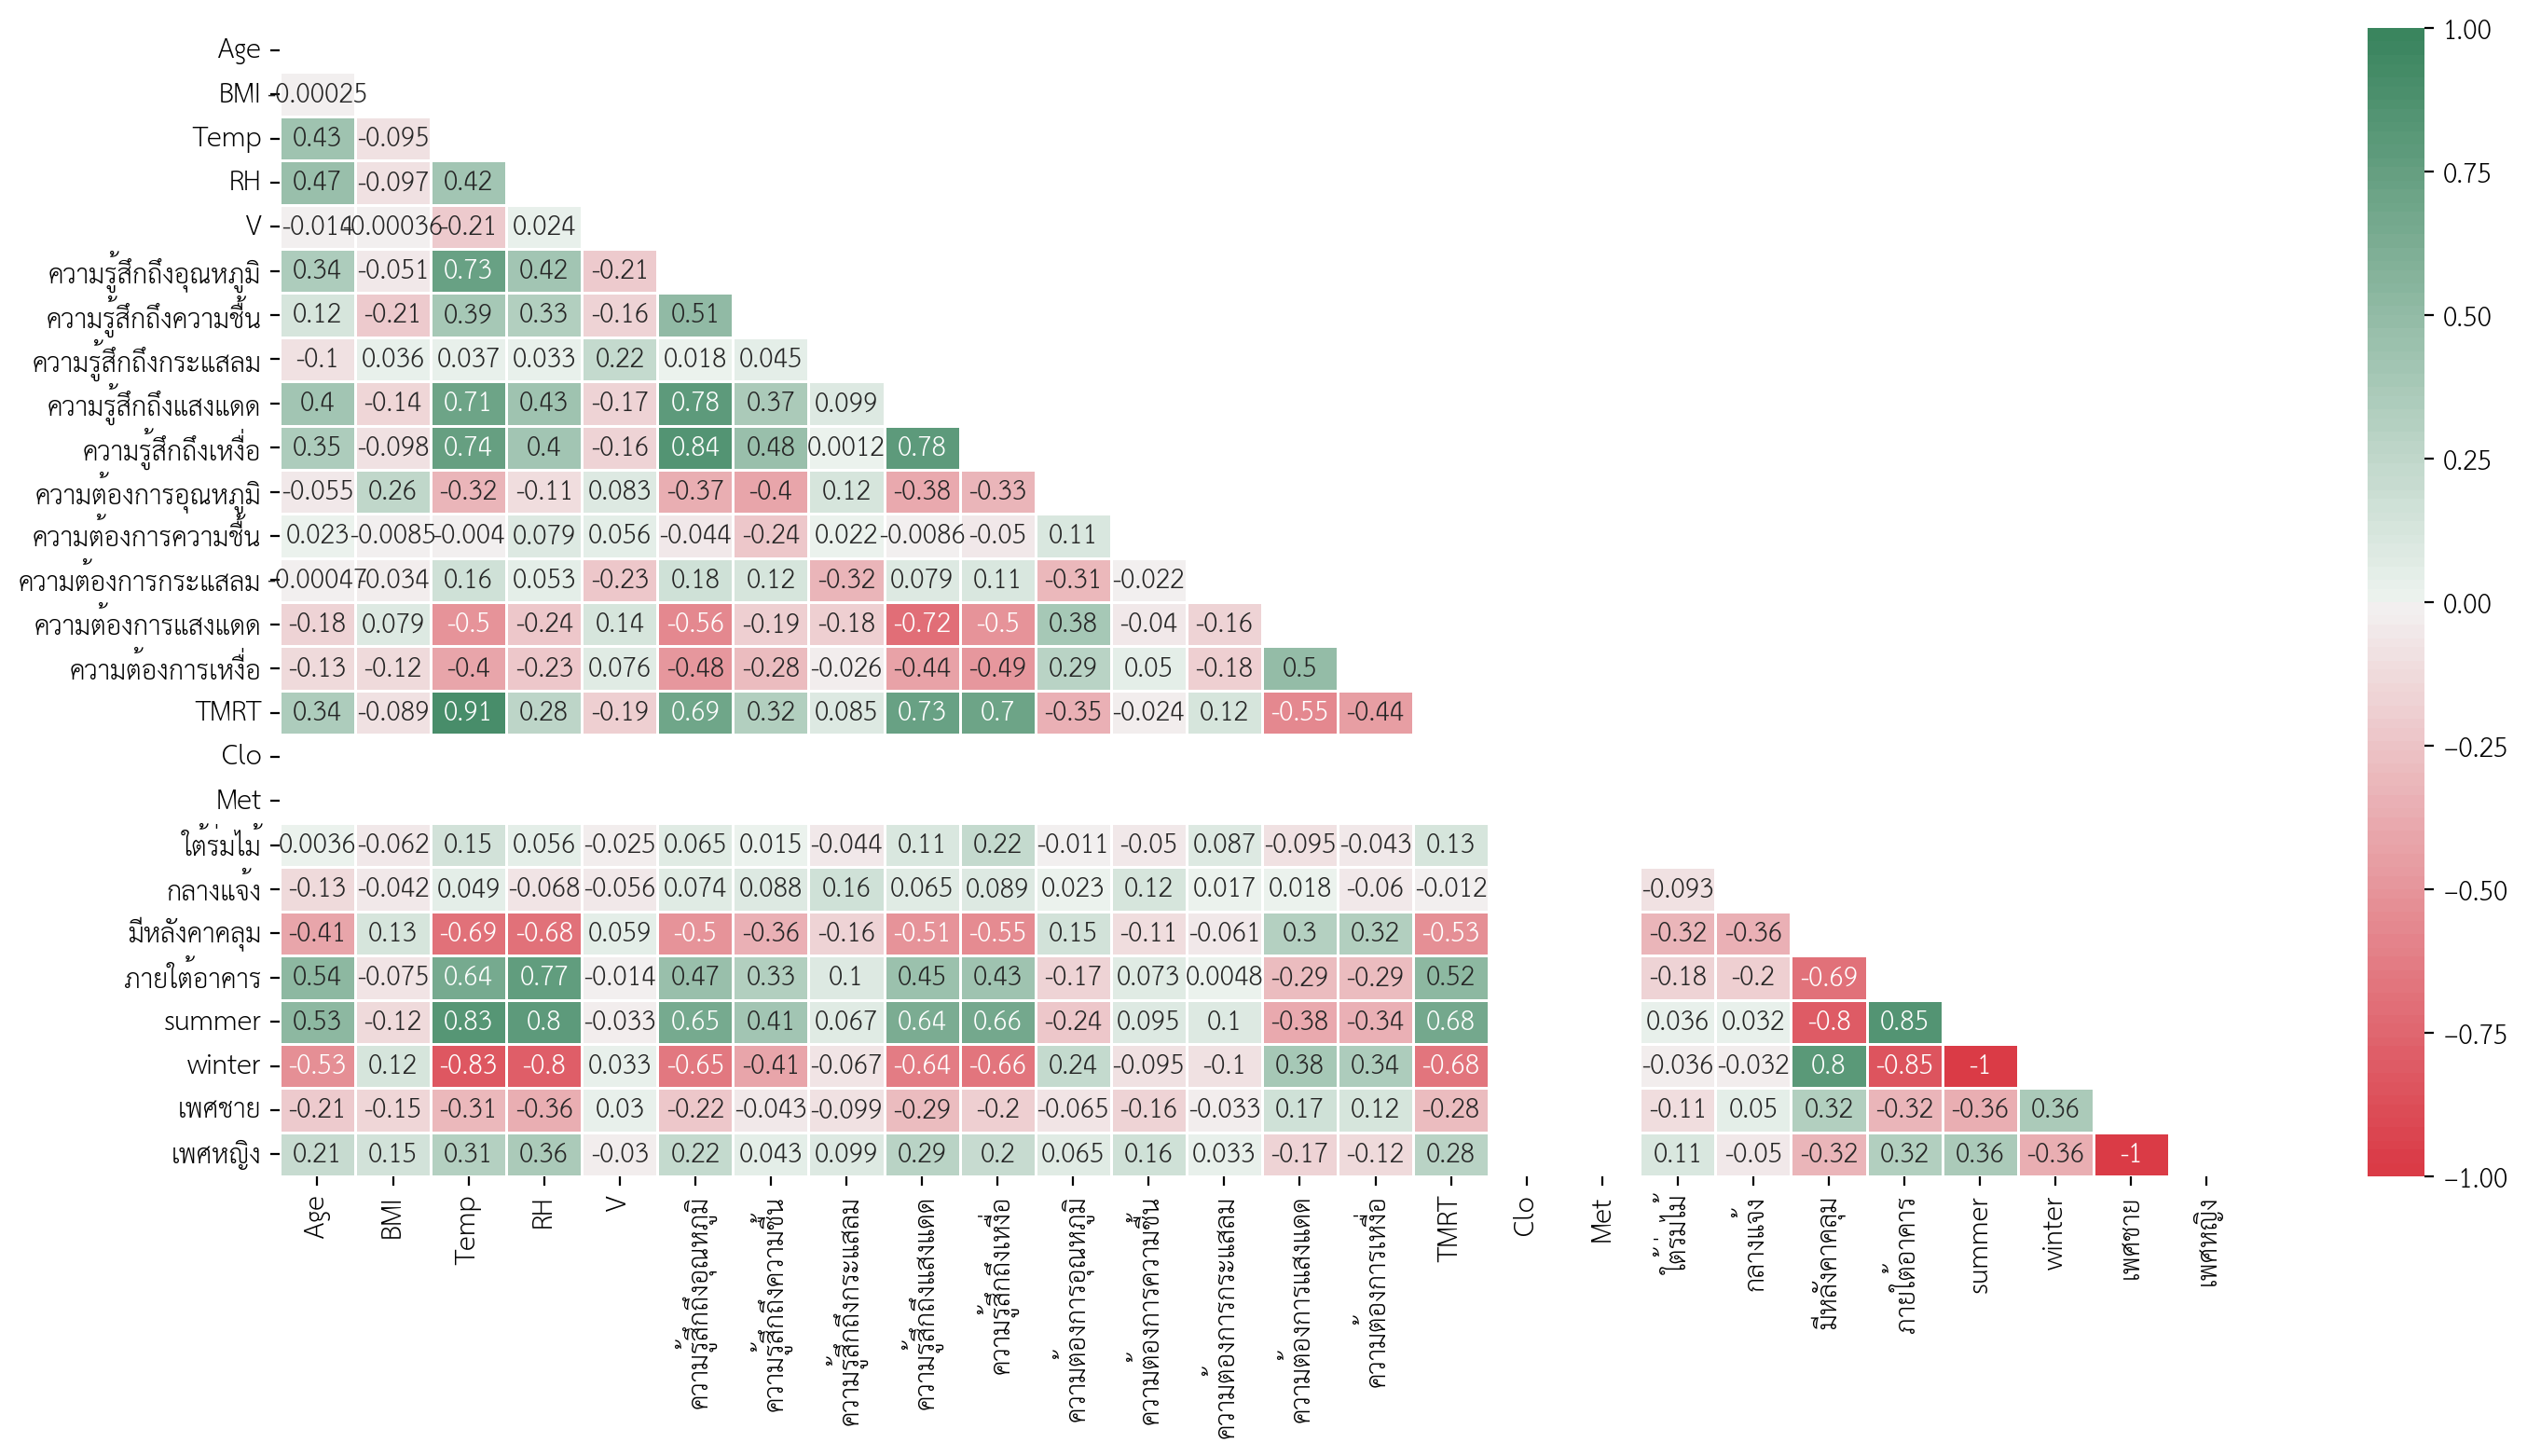

In [62]:
cols = X.columns
dcorr=df_encoded[cols].corr()
# dcorr

mask = np.zeros_like(dcorr)
# mask.shape
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

#Models
##แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote

##stratified fk

In [63]:
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
splits = kfold.split(X,y)
print(f'สัดส่วนของ TA ใน dataset\n{y.value_counts() / len(X)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)


     # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nสัดส่วนของ TA ใน TRAINING SET\n'+
          f'{df_encoded.iloc[test_index,5].value_counts() / len(df_encoded.iloc[test_index,5])}\nสัดส่วนของ TA ใน TEST SET\n'+
          f'{df_encoded.iloc[train_index,5].value_counts() / len(df_encoded.iloc[train_index,5])}\n')
    print(f"Training set size of X after resampling: {X_train_res.shape}")
    print(f"Test set size of X : {X_test_scaled.shape}")




สัดส่วนของ TA ใน dataset
0    0.891192
1    0.108808
Name: Thermal_acceptance, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TA ใน TRAINING SET
0    0.897436
1    0.102564
Name: Thermal_acceptance, dtype: float64
สัดส่วนของ TA ใน TEST SET
0    0.88961
1    0.11039
Name: Thermal_acceptance, dtype: float64

Training set size of X after resampling: (274, 26)
Test set size of X : (39, 26)
SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TA ใน TRAINING SET
0    0.897436
1    0.102564
Name: Thermal_acceptance, dtype: float64
สัดส่วนของ TA ใน TEST SET
0    0.88961
1    0.11039
Name: Thermal_acceptance, dtype: float64

Training set size of X after resampling: (274, 26)
Test set size of X : (39, 26)
SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
สัดส่วนของ TA ใน TRAINING SET
0    0.871795
1    0.128205
Name: Thermal_acceptance, dtype: float64
สัดส่วนของ TA ใน TEST SET
0    0.896104
1    0.103896
Name: Thermal_acceptance, dtype: float64

Tr

##kf

In [ ]:
 from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
 from imblearn.over_sampling import SMOTE
 from sklearn.preprocessing import StandardScaler

# # ตั้งค่าพารามิเตอร์สำหรับ K-Fold
 k = 5
 kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # วนลูปผ่าน K-Fold
 for train_index, test_index in kf.split(X):
# #     # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # ทำมาตรฐานข้อมูล
     scaler = StandardScaler()
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)

     X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
     X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)


     # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
     smote = SMOTE(random_state=42)
     X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


     print(f"Training set size after resampling: {X_train_res.shape}")
     print(f"Test set size: {X_test_scaled.shape}")


Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (274, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (38, 26)
Training set size after resampling: (280, 26)
Test set size: (38, 26)


#Logistics Regression

In [ ]:
 param_grid = dict(
     C= [0.001, 0.01, 0.1, 1, 10, 100],
     penalty=['l1','l2'],
     max_iter= [100, 200, 500, 1000],
    solver= ['lbfgs', 'saga']
 )
 lgt_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True, verbose=0)
 lgt_grid.fit(X_train_res, y_train_res)
 print("best_params :",lgt_grid.best_params_)
 print("accuracy :",lgt_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best_params : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9018831168831168


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

best_params : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9018831168831168

In [64]:
Log_reg = LogisticRegression(C= 0.1, max_iter=100, penalty= 'l2', solver= 'lbfgs', random_state=42)

# Train the model
Log_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(cross_val_score(Log_reg,X_train_res, y_train_res, cv=5, scoring='accuracy').mean())

[[30  4]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        34
           1       0.43      0.75      0.55         4

    accuracy                           0.87        38
   macro avg       0.70      0.82      0.73        38
weighted avg       0.91      0.87      0.88        38

0.9018831168831168


##shap

In [29]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.1 MB/s eta 0:00:00


In [30]:
class_names = [0,1]

#Random forest


In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
rf_grid.fit(X_train_res, y_train_res)
print("best_params :",rf_grid.best_params_)
print("accuracy :",rf_grid.best_score_)

best_params : {'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'min_samples_split': 7, 'n_estimators': 100}
accuracy : 0.9200649350649351


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Define your clf with specified parameters
rf = RandomForestClassifier(criterion='entropy', max_depth=7, max_features=2, min_samples_split=7, n_estimators=100, random_state=42)

# Fit the classifier on the training data
result = rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Perform cross-validation predictions
Y_pred2 = cross_val_predict(rf, X_test_scaled, y_test, cv=5)

# Compute confusion matrices
conf_matrix1 = confusion_matrix(y_test, Y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Print confusion matrices
print("Confusion matrix for cross-validation predictions:\n", conf_matrix1)
print("Confusion matrix for test predictions:\n", conf_matrix2)

# Print classification reports
print("Classification report for cross-validation predictions:\n", classification_report(y_test, Y_pred2))
print("Classification report for test predictions:\n", classification_report(y_test, y_pred))

# Initialize a list to store confusion matrices from cross-validation splits
conf_matrices = []

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    # Fit the classifier
    rf.fit(X.iloc[train_index], y.iloc[train_index])
    # Make predictions
    Y_pred_kfold = rf.predict(X.iloc[test_index])
    # Compute and store confusion matrix
    conf_matrix_kfold = confusion_matrix(y[test_index], Y_pred_kfold)
    conf_matrices.append(conf_matrix_kfold)

# Print confusion matrices for each fold
for i, conf_matrix_kfold in enumerate(conf_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", conf_matrix_kfold)

The least populated class in y has only 4 members, which is less than n_splits=5.


Confusion matrix for cross-validation predictions:
 [[34  0]
 [ 3  1]]
Confusion matrix for test predictions:
 [[33  1]
 [ 1  3]]
Classification report for cross-validation predictions:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.25      0.40         4

    accuracy                           0.92        38
   macro avg       0.96      0.62      0.68        38
weighted avg       0.93      0.92      0.90        38

Classification report for test predictions:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      0.75      0.75         4

    accuracy                           0.95        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.95      0.95      0.95        38

Confusion matrix for fold 1:
 [[35  0]
 [ 2  2]]
Confusion matrix for fold 2:
 [[35  0]
 [ 2  2]]
Confusion matrix

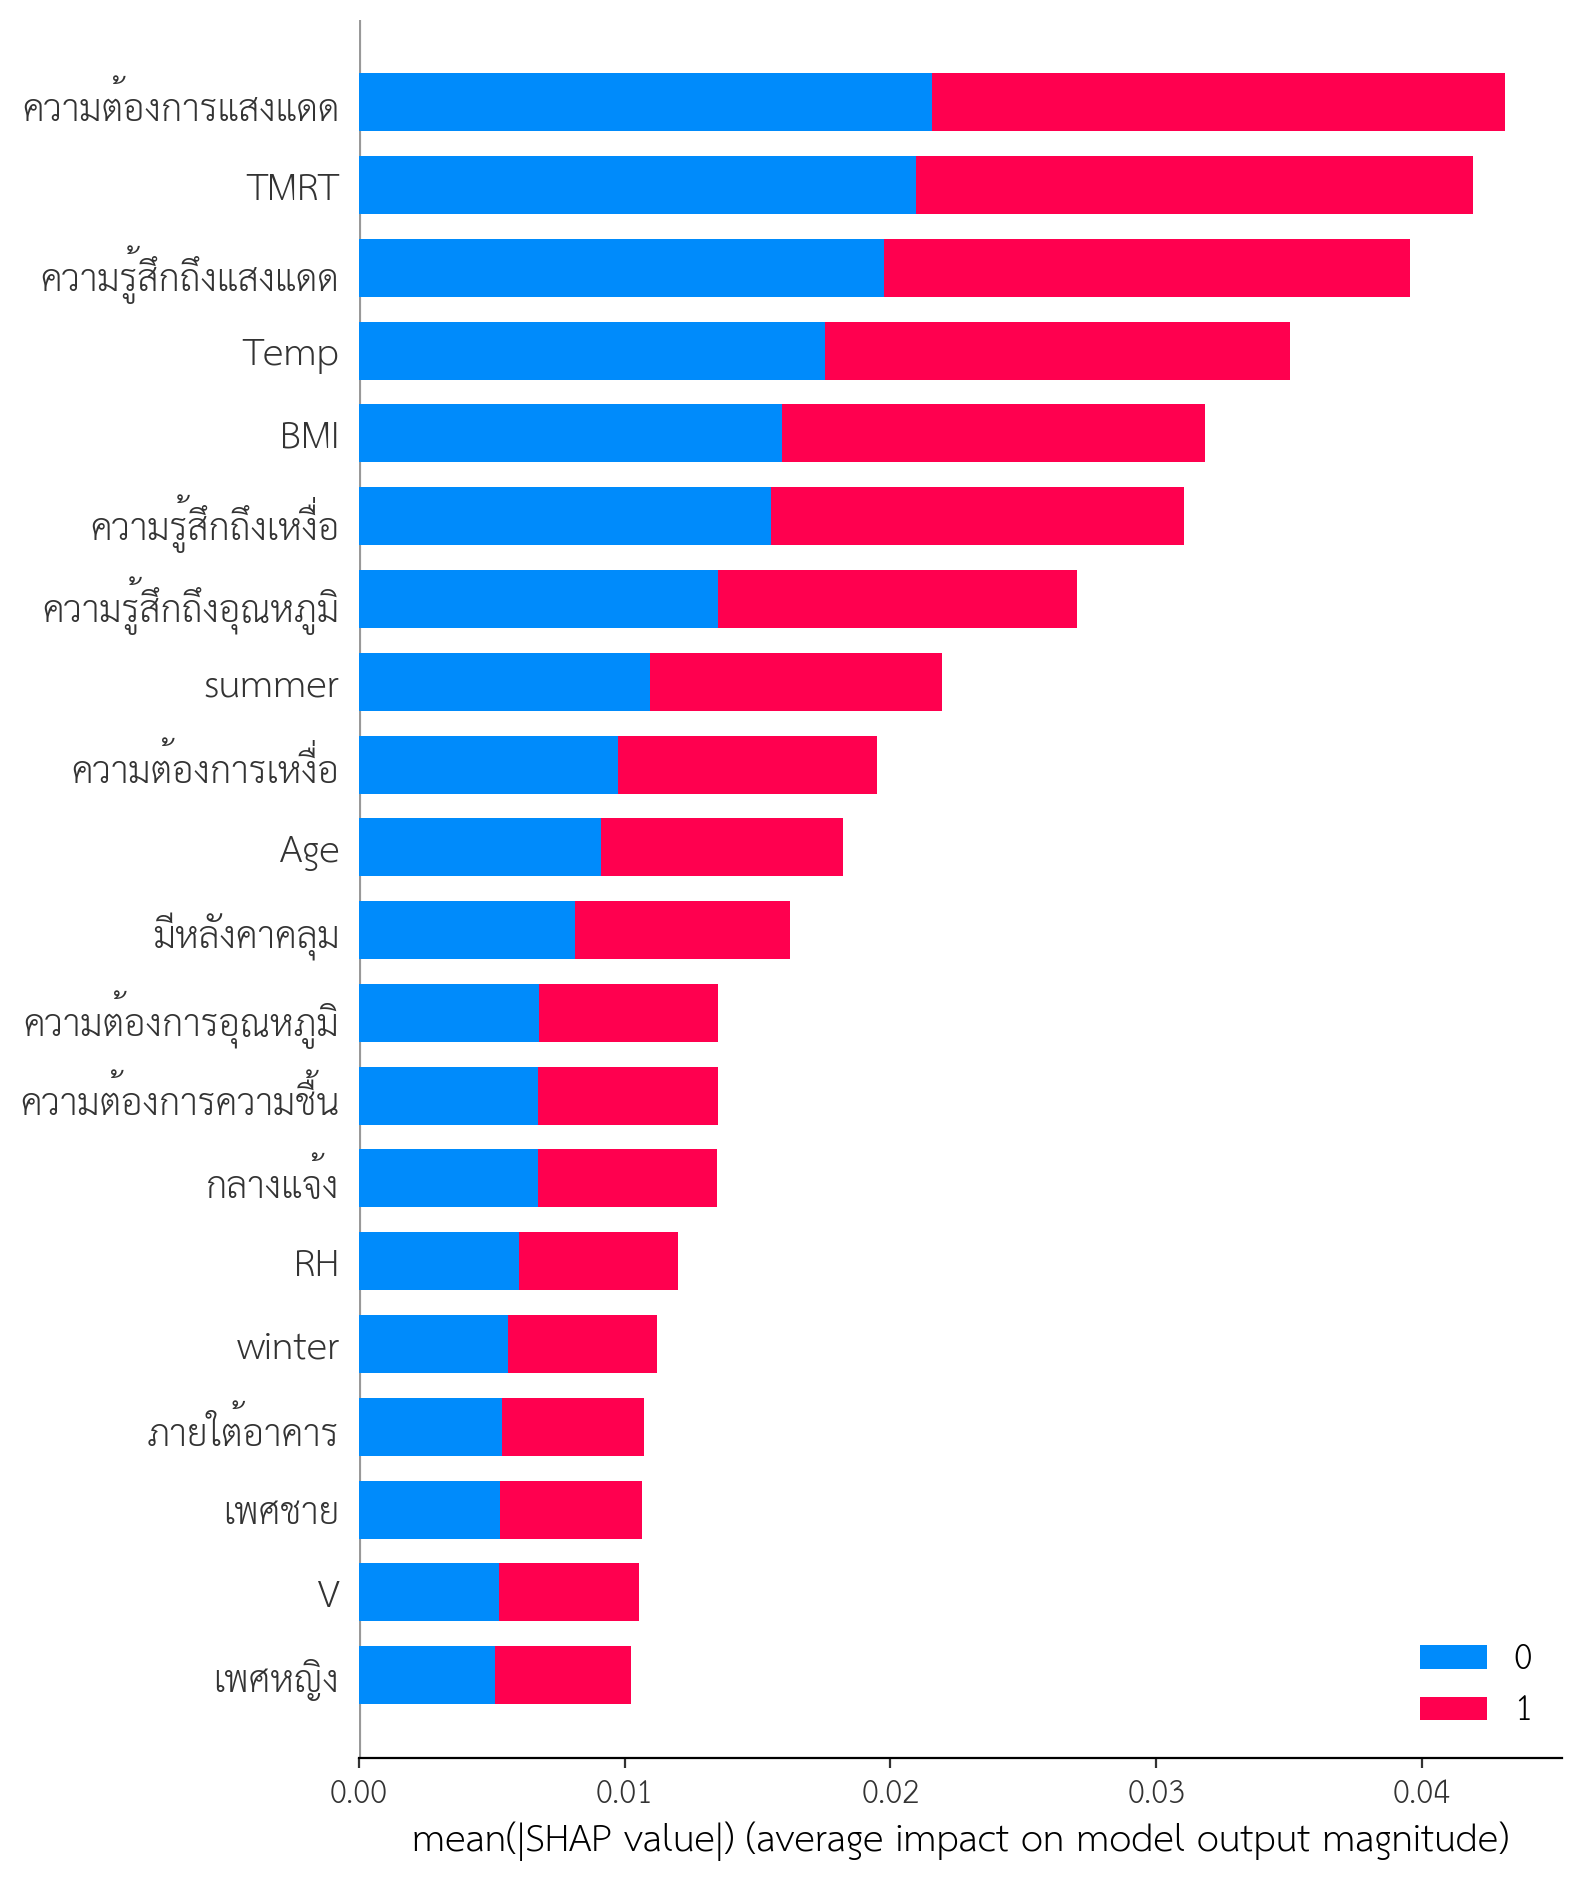

In [66]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(result)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)


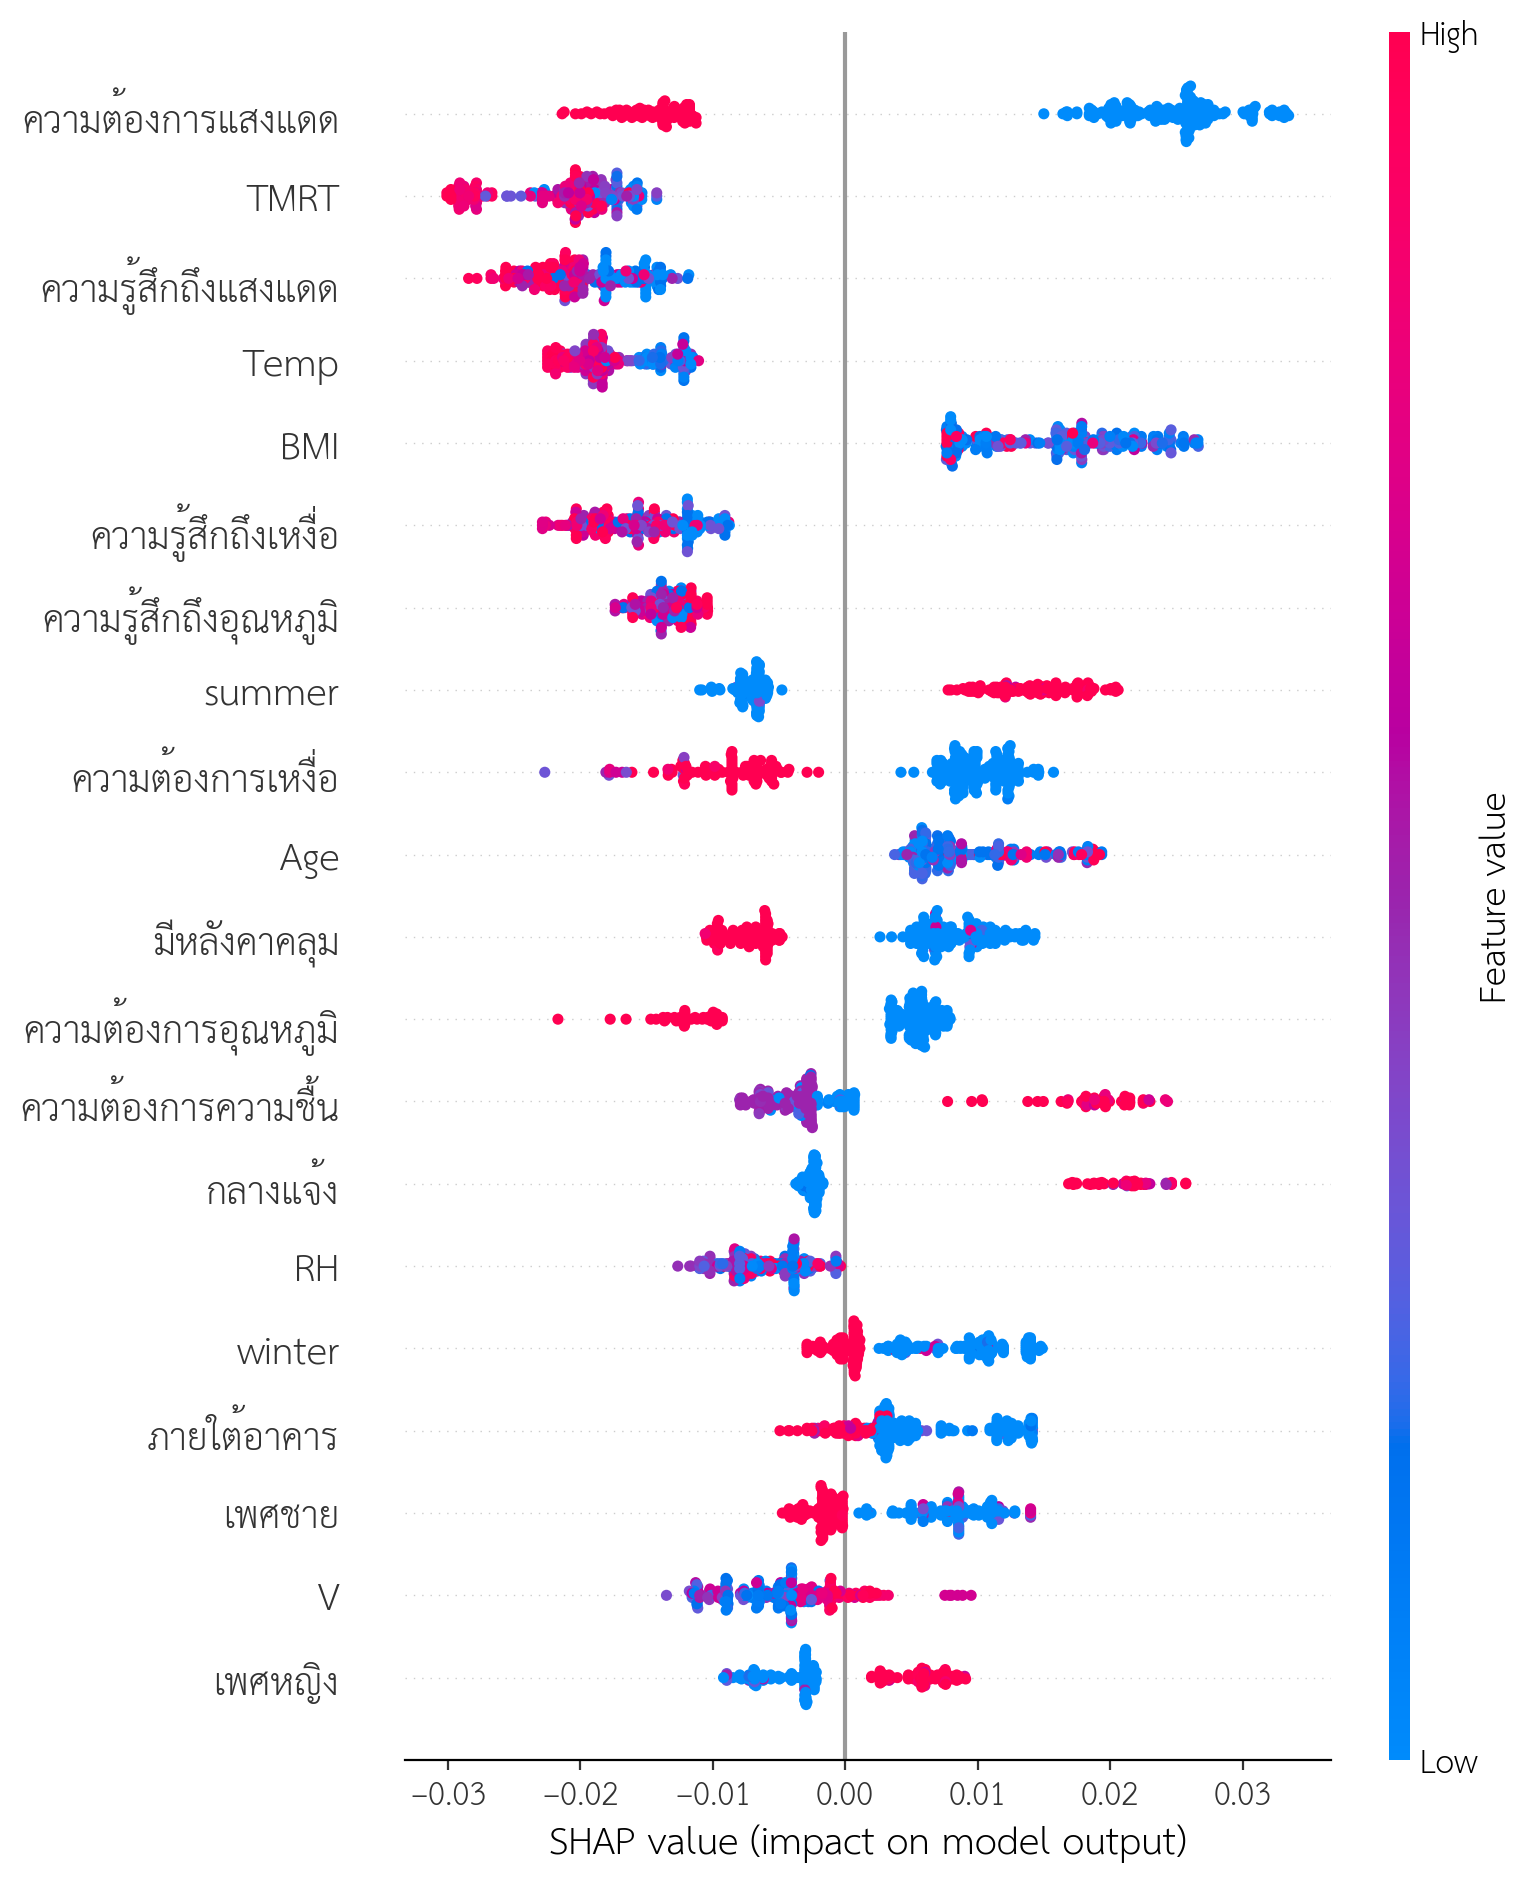

In [40]:
shap.summary_plot(shapValues[1], X_train_res.values, feature_names = X_train_res.columns)

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


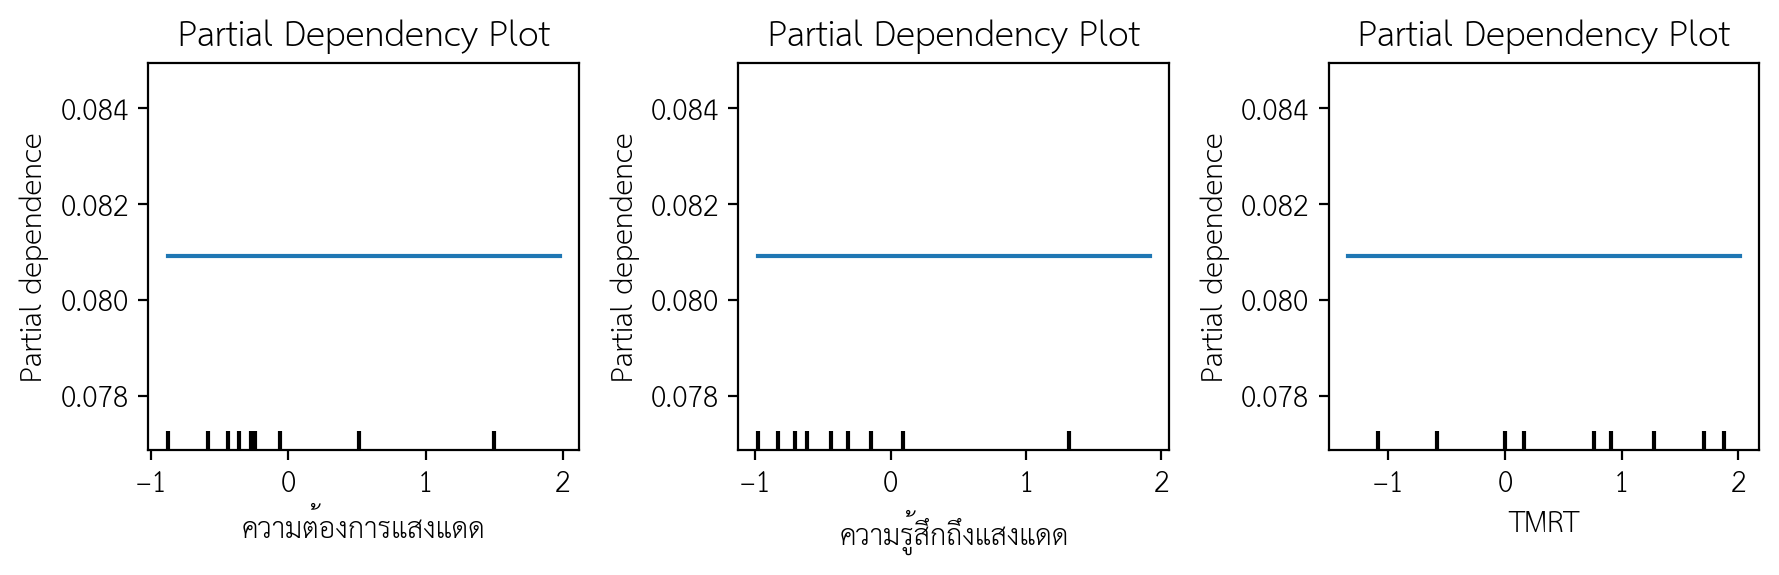

In [67]:
base_features = ['ความต้องการแสงแดด','ความรู้สึกถึงแสงแดด','TMRT']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#XGBoost

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.3}
accuracy : 0.9055844155844156


In [44]:
#xgb = XGBClassifier(learning_rate= 0.2, max_depth= 5, min_child_weight= 1, n_estimators= 10,subsample=0.3, random_state=42)

#xgb.fit(X_train_res, y_train_res)

# Make predictions on the test set
#y_pred = xgb.predict(X_test_scaled)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print("แต่ละ fold :",cross_val_score(xgb,X_train_res, y_train_res, cv=5, scoring='accuracy'))
#print("เฉลี่ย 5 fold :",cross_val_score(xgb,X_train_res, y_train_res, cv=5, scoring='accuracy').mean())

In [45]:
# Define your clf with specified parameters
xgb = XGBClassifier(learning_rate= 0.2, max_depth= 5, min_child_weight= 1, n_estimators= 10,subsample=0.3, random_state=42)

# Fit the classifier on the training data
xgb.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)

# Perform cross-validation predictions
Y_pred2 = cross_val_predict(xgb, X_test_scaled, y_test, cv=5)

# Compute confusion matrices
conf_matrix1 = confusion_matrix(y_test, Y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Print confusion matrices
print("Confusion matrix for cross-validation predictions:\n", conf_matrix1)
print("Confusion matrix for test predictions:\n", conf_matrix2)

# Print classification reports
print("Classification report for cross-validation predictions:\n", classification_report(y_test, Y_pred2))
print("Classification report for test predictions:\n", classification_report(y_test, y_pred))

# Initialize a list to store confusion matrices from cross-validation splits
conf_matrices = []

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    # Fit the classifier
    xgb.fit(X.iloc[train_index], y.iloc[train_index])
    # Make predictions
    Y_pred_kfold = xgb.predict(X.iloc[test_index])
    # Compute and store confusion matrix
    conf_matrix_kfold = confusion_matrix(y[test_index], Y_pred_kfold)
    conf_matrices.append(conf_matrix_kfold)

# Print confusion matrices for each fold
for i, conf_matrix_kfold in enumerate(conf_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", conf_matrix_kfold)

The least populated class in y has only 4 members, which is less than n_splits=5.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Confusion matrix for cross-validation predictions:
 [[34  0]
 [ 4  0]]
Confusion matrix for test predictions:
 [[33  1]
 [ 1  3]]
Classification report for cross-validation predictions:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       0.00      0.00      0.00         4

    accuracy                           0.89        38
   macro avg       0.45      0.50      0.47        38
weighted avg       0.80      0.89      0.85        38

Classification report for test predictions:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      0.75      0.75         4

    accuracy                           0.95        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.95      0.95      0.95        38

Confusion matrix for fold 1:
 [[35  0]
 [ 4  0]]
Confusion matrix for fold 2:
 [[35  0]
 [ 3  1]]
Confusion matrix

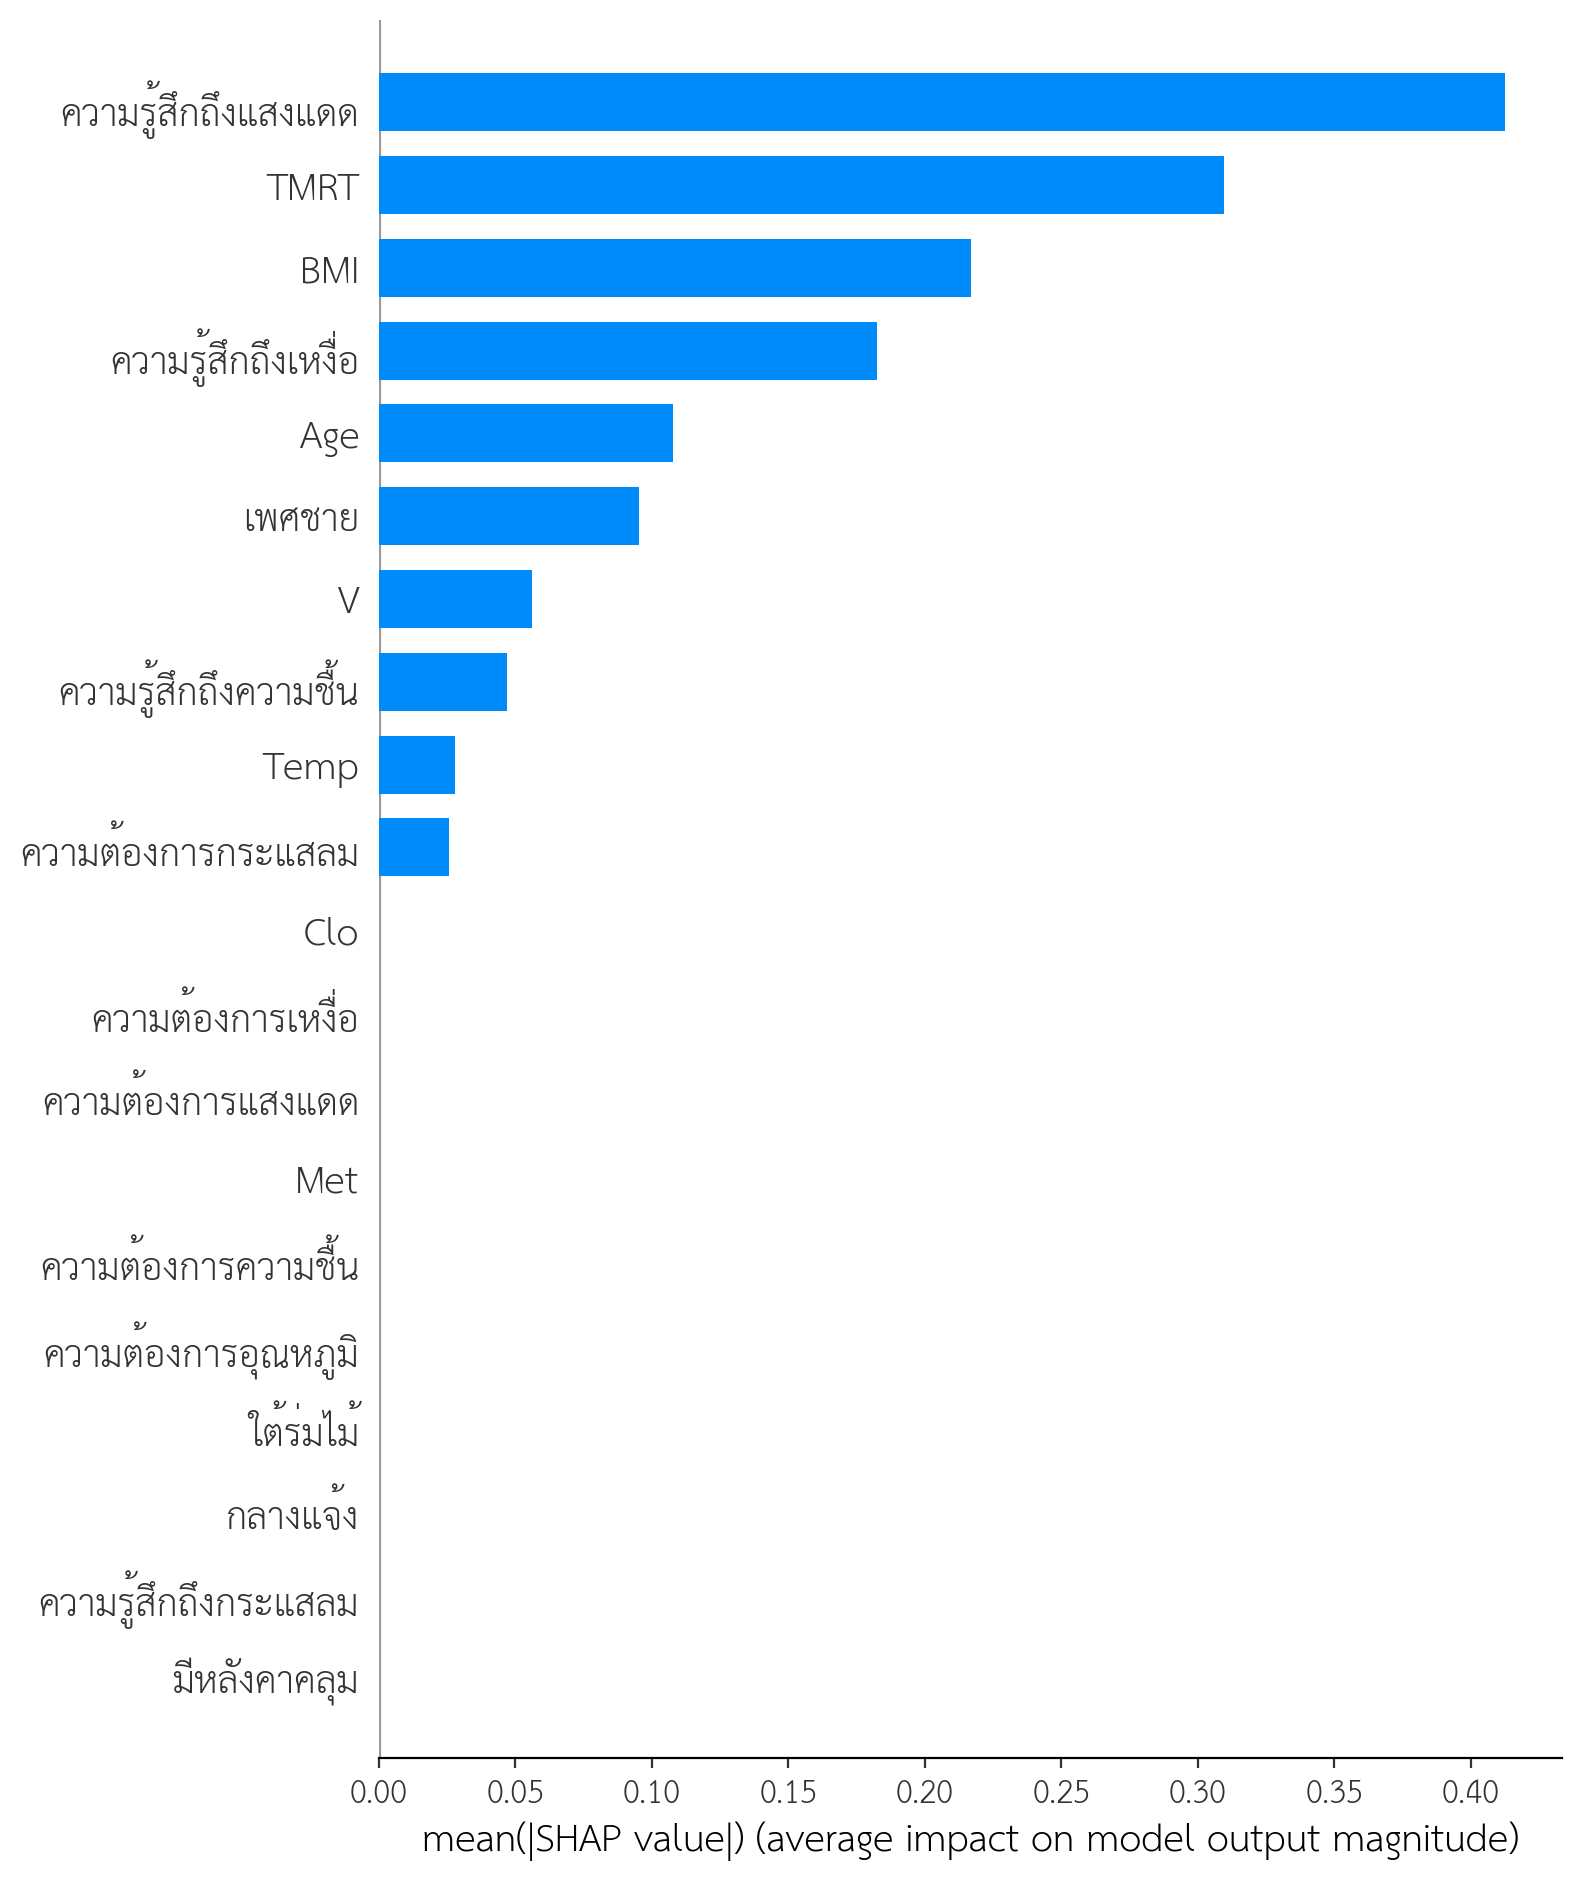

In [46]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(xgb)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res.values, plot_type = 'bar', class_names= class_names, feature_names = X_train_res.columns)

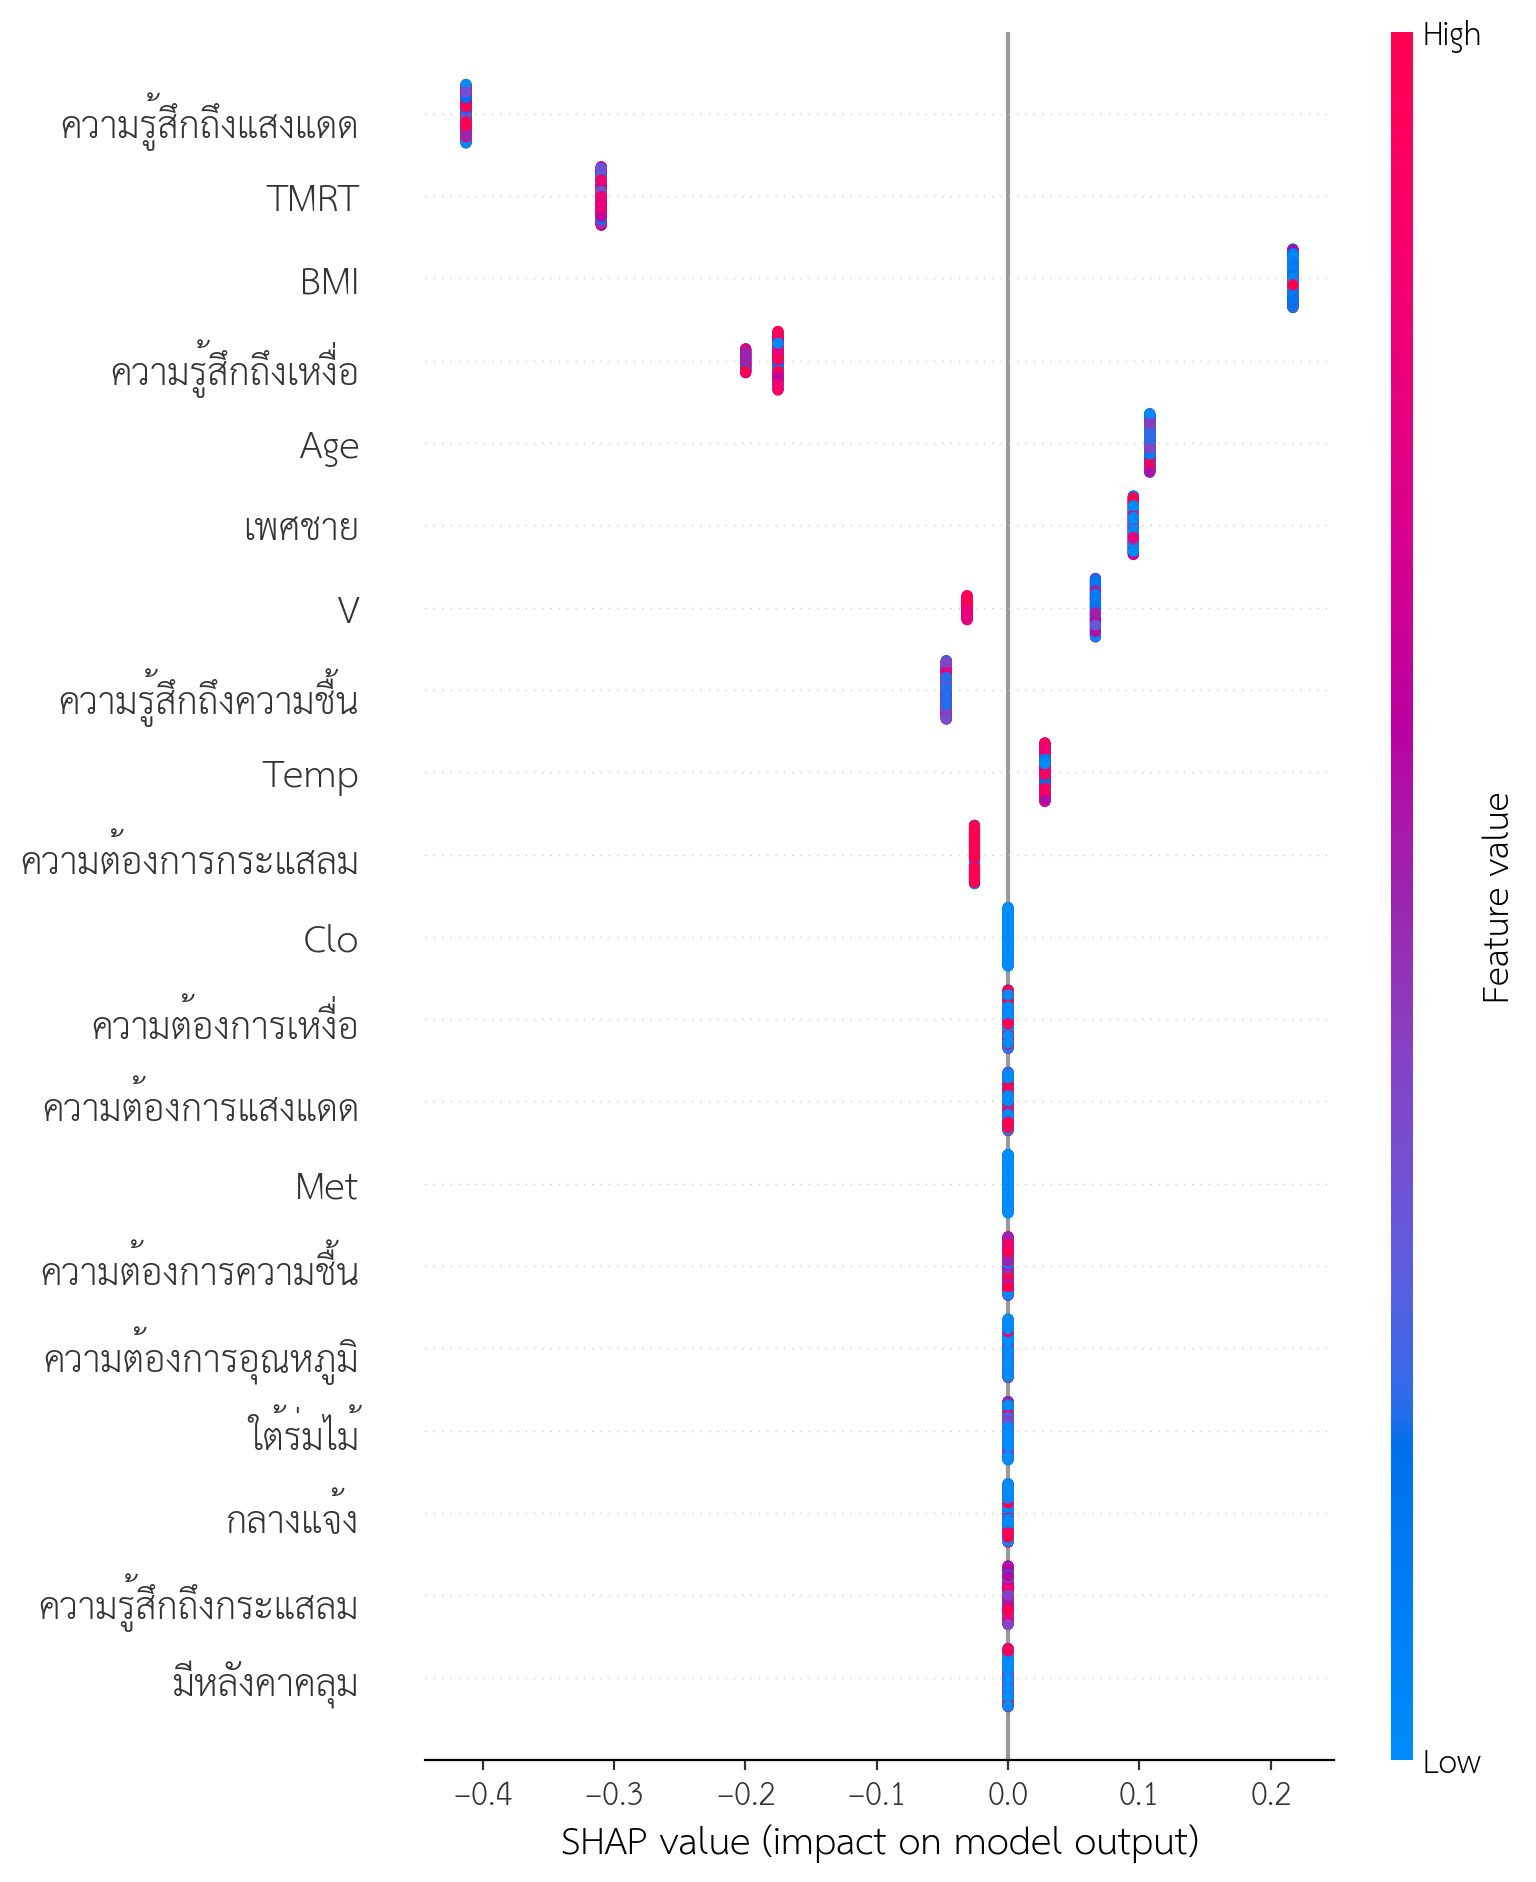

In [47]:
shap.summary_plot(shapValues, X_train_res)

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
Attempting to set identical low and high ylims makes transformation singular; automatically expanding.


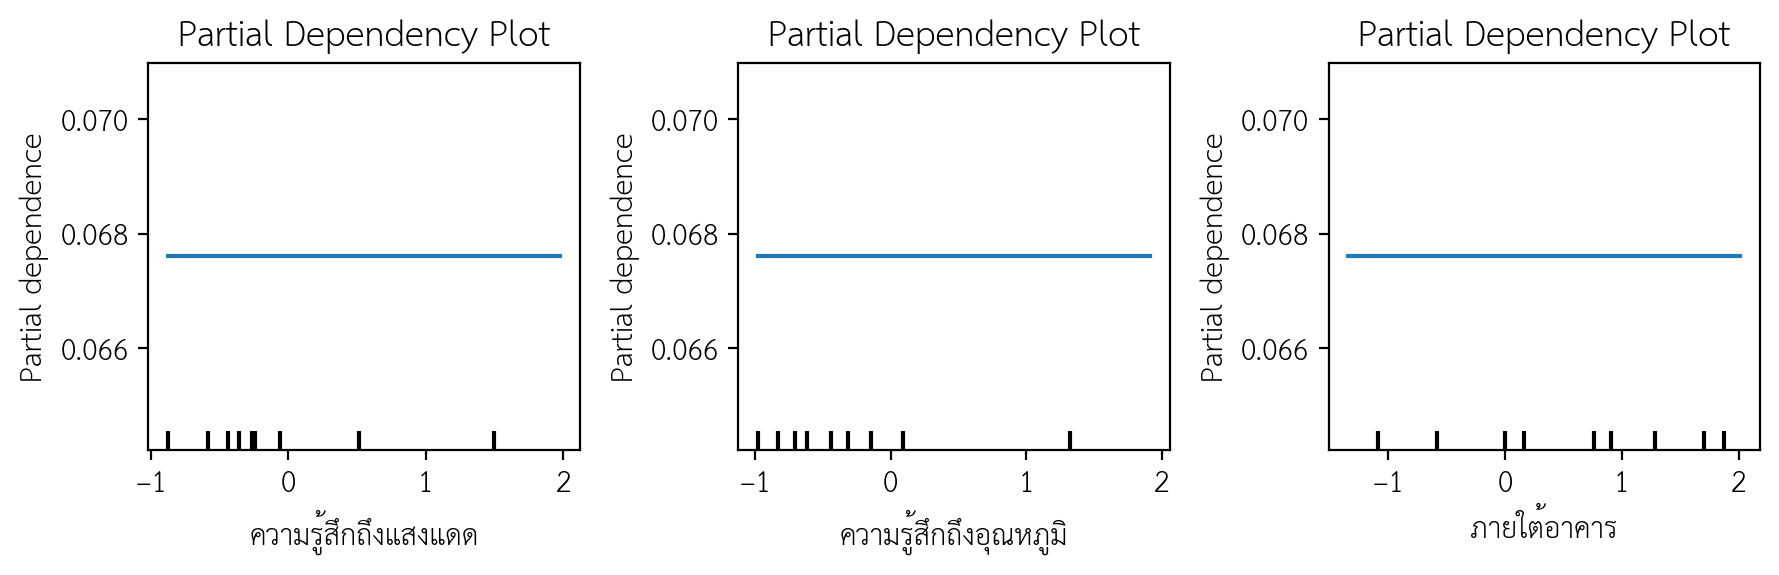

In [48]:
base_features = ['ความรู้สึกถึงแสงแดด','ความรู้สึกถึงอุณหภูมิ','ภายใต้อาคาร']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        xgb,
        X_train_res,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#SVC

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.96


In [49]:
#svm = SVC(C= 100,gamma= 0.1, kernel='rbf', random_state=42)

#svm.fit(X_train_res, y_train_res)

# Make predictions on the test set
#y_pred = svm.predict(X_test_scaled)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print("แต่ละ fold :",cross_val_score(svm,X_train_res, y_train_res, cv=5, scoring='accuracy'))
#print("เฉลี่ย 5 fold :",cross_val_score(svm,X_train_res, y_train_res, cv=5, scoring='accuracy').mean())

In [50]:
# Define your clf with specified parameters
svm = SVC(C= 100,gamma= 0.1, kernel='rbf', random_state=42)

# Fit the classifier on the training data
svm.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Perform cross-validation predictions
Y_pred2 = cross_val_predict(svm, X_test_scaled, y_test, cv=5)

# Compute confusion matrices
conf_matrix1 = confusion_matrix(y_test, Y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Print confusion matrices
print("Confusion matrix for cross-validation predictions:\n", conf_matrix1)
print("Confusion matrix for test predictions:\n", conf_matrix2)

# Print classification reports
print("Classification report for cross-validation predictions:\n", classification_report(y_test, Y_pred2))
print("Classification report for test predictions:\n", classification_report(y_test, y_pred))

# Initialize a list to store confusion matrices from cross-validation splits
conf_matrices = []

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    # Fit the classifier
    svm.fit(X.iloc[train_index], y.iloc[train_index])
    # Make predictions
    Y_pred_kfold = svm.predict(X.iloc[test_index])
    # Compute and store confusion matrix
    conf_matrix_kfold = confusion_matrix(y[test_index], Y_pred_kfold)
    conf_matrices.append(conf_matrix_kfold)

# Print confusion matrices for each fold
for i, conf_matrix_kfold in enumerate(conf_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", conf_matrix_kfold)

Confusion matrix for cross-validation predictions:
 [[34  0]
 [ 4  0]]
Confusion matrix for test predictions:
 [[33  1]
 [ 1  3]]
Classification report for cross-validation predictions:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       0.00      0.00      0.00         4

    accuracy                           0.89        38
   macro avg       0.45      0.50      0.47        38
weighted avg       0.80      0.89      0.85        38

Classification report for test predictions:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      0.75      0.75         4

    accuracy                           0.95        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.95      0.95      0.95        38

Confusion matrix for fold 1:
 [[35  0]
 [ 4  0]]
Confusion matrix for fold 2:
 [[34  1]
 [ 4  0]]
Confusion matrix

The least populated class in y has only 4 members, which is less than n_splits=5.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(svm.predict, X_train_res)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_res)

  0%|          | 0/276 [00:00<?, ?it/s]

In [51]:
# Summary features contribute in model
#shap.summary_plot(shap_values, X_train_res.values, class_names=class_names, feature_names = X_train_res.columns)

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(10, 8))
# Plotting our two-features-space
#sns.scatterplot(x=X_train_res.iloc[:, 2],
#                y=X_train_res.iloc[:, 3],
#                hue=y_train_res,
#                s=8);
# Constructing a hyperplane using a formula.
#w = svm.coef_[0]           # w consists of 2 elements
#b = svm.intercept_[0]      # b consists of 1 element
#x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
#y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
#plt.plot(x_points, y_points, c='r');

#KNN

In [ ]:
param_grid = dict(
    n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    weights=['uniform', 'distance'],
    algorithm=['auto', 'kd_tree']
)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, refit=True, verbose=0)
knn_grid.fit(X_train_res, y_train_res)
print("best_params :",knn_grid.best_params_)
print("accuracy :",knn_grid.best_score_)

best_params : {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
accuracy : 0.9127272727272728


In [52]:
#knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 1, weights= 'uniform')

#knn.fit(X_train_res, y_train_res)

# Make predictions on the test set
#y_pred = knn.predict(X_test_scaled)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print("แต่ละ fold :",cross_val_score(knn,X_train_res, y_train_res, cv=5, scoring='accuracy'))
#print("เฉลี่ย 5 fold :",cross_val_score(knn,X_train_res, y_train_res, cv=5, scoring='accuracy').mean())

In [53]:
# Define your clfr with specified parameters
knn = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 1, weights= 'uniform')

# Fit the classifier on the training data
knn.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Perform cross-validation predictions
Y_pred2 = cross_val_predict(knn, X_test_scaled, y_test, cv=5)

# Compute confusion matrices
conf_matrix1 = confusion_matrix(y_test, Y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Print confusion matrices
print("Confusion matrix for cross-validation predictions:\n", conf_matrix1)
print("Confusion matrix for test predictions:\n", conf_matrix2)

# Print classification reports
print("Classification report for cross-validation predictions:\n", classification_report(y_test, Y_pred2))
print("Classification report for test predictions:\n", classification_report(y_test, y_pred))

# Initialize a list to store confusion matrices from cross-validation splits
conf_matrices = []

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X, y):
    # Fit the classifier
    knn.fit(X.iloc[train_index], y.iloc[train_index])
    # Make predictions
    Y_pred_kfold = knn.predict(X.iloc[test_index])
    # Compute and store confusion matrix
    conf_matrix_kfold = confusion_matrix(y[test_index], Y_pred_kfold)
    conf_matrices.append(conf_matrix_kfold)

# Print confusion matrices for each fold
for i, conf_matrix_kfold in enumerate(conf_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", conf_matrix_kfold)

The least populated class in y has only 4 members, which is less than n_splits=5.


Confusion matrix for cross-validation predictions:
 [[34  0]
 [ 2  2]]
Confusion matrix for test predictions:
 [[33  1]
 [ 1  3]]
Classification report for cross-validation predictions:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.50      0.67         4

    accuracy                           0.95        38
   macro avg       0.97      0.75      0.82        38
weighted avg       0.95      0.95      0.94        38

Classification report for test predictions:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      0.75      0.75         4

    accuracy                           0.95        38
   macro avg       0.86      0.86      0.86        38
weighted avg       0.95      0.95      0.95        38

Confusion matrix for fold 1:
 [[32  3]
 [ 2  2]]
Confusion matrix for fold 2:
 [[34  1]
 [ 3  1]]
Confusion matrix

In [ ]:
# Create a KernelExplainer
explainer = shap.KernelExplainer(knn.predict, X_train_res)

# Compute SHAP values
shap_values = explainer.shap_values(X_train_res)

  0%|          | 0/276 [00:00<?, ?it/s]